In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

In [24]:
task = 5
model = 'openai-clip-vit-base-patch32_score_0.8345'

In [25]:
gold_df = pd.read_json(f'task{task}_val_hard_gold.json')[['id', 'value']]
pred_df = pd.read_json(f'Task {task} Results/{model}_val_hard.json')[['id', 'value']]

In [26]:
merged = pd.merge(pred_df, gold_df, how='inner', on='id')
merged

,id,value_x,value_y
0,110002,JUDGEMENTAL,DIRECT
1,110005,DIRECT,NO
2,110012,DIRECT,DIRECT
3,110017,DIRECT,DIRECT
4,110020,JUDGEMENTAL,DIRECT
...,...,...,...
652,211978,JUDGEMENTAL,DIRECT
653,211982,DIRECT,NO
654,211993,NO,NO
655,211995,DIRECT,NO


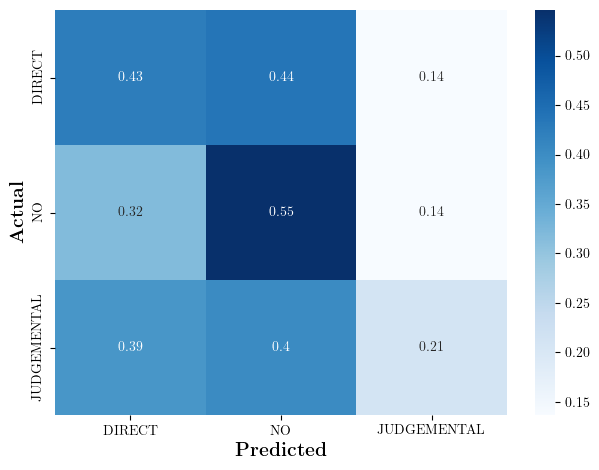

In [27]:
labels = merged['value_y'].unique()

# Calculate confusion matrix
conf_matrix = confusion_matrix(merged['value_y'], merged['value_x'], labels=labels)

# Normalize the confusion matrix to get percentages
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Create a heatmap
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels with LaTeX
plt.xlabel(r'\textbf{Predicted}', fontsize=14)
plt.ylabel(r'\textbf{Actual}', fontsize=14)

plt.tight_layout()

# Save the plot to a PDF file
plt.savefig(f'task_{task}_{model}_confusion_matrix.pdf', format='pdf')

In [6]:
gold_df[gold_df['value'] == 'YES']

,id,value
0,110002,YES
2,110012,YES
3,110017,YES
4,110020,YES
5,110022,YES
...,...,...
697,211961,YES
698,211975,YES
699,211978,YES
700,211979,YES
